# Final project

### Import libraries

In [49]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
import plotly.graph_objs as plotly  # for interactive plots

import tensorflow as tf
from tensorflow.keras.datasets import imdb

---
### Step 1: Data ingestion

In [50]:

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
data_dict_df = pd.read_csv('data_dictionary.csv')

# Get the size (number of rows and columns) of each DataFrame
train_size = train_df.shape
test_size = test_df.shape
dict_size = data_dict_df.shape

print(f"Train Data Size: {train_size}")
print(f"Test Data Size: {test_size}")
print(f"Dict Data Size: {dict_size}")

Train Data Size: (3960, 82)
Test Data Size: (20, 59)
Dict Data Size: (81, 6)


In [51]:

# Display the first few rows of each file to understand their structure and contents
print("Train Data:")
display(train_df.head())

print("Test Data:")
display(test_df.head())

print("\nData Dictionary:")
display(data_dict_df.head())


Train Data:


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Test Data:


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Data Dictionary:


,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


Lets 
- Find which columns are unique in train or test set
- make one dataframe based on common columns

In [52]:
# Identify columns unique to train and test
train_only_columns = set(train_df.columns) - set(test_df.columns)
test_only_columns = set(test_df.columns) - set(train_df.columns)

# Find descriptions for columns unique to train in the data dictionary
train_only_desc = data_dict_df[data_dict_df['Field'].isin(train_only_columns)]

# Find descriptions for columns unique to test in the data dictionary
test_only_desc = data_dict_df[data_dict_df['Field'].isin(test_only_columns)]

# Display results
print("Descriptions for columns in train but not in test:")
print(train_only_desc[['Field', 'Description']])

print("\nDescriptions for columns in test but not in train:")
print(test_only_desc[['Field', 'Description']])

Descriptions for columns in train but not in test:
                Field                                        Description
54       PCIAT-Season                            Season of participation
55     PCIAT-PCIAT_01  How often does your child disobey time limits ...
56     PCIAT-PCIAT_02  How often does your child neglect household ch...
57     PCIAT-PCIAT_03  How often does your child prefer to spend time...
58     PCIAT-PCIAT_04  How often does your child form new relationshi...
59     PCIAT-PCIAT_05  How often do you complain about the amount of ...
60     PCIAT-PCIAT_06  How often do your child's grades suffer becaus...
61     PCIAT-PCIAT_07  How often does your child check his or her e-m...
62     PCIAT-PCIAT_08  How often does your child seem withdrawn from ...
63     PCIAT-PCIAT_09  How often does your child become defensive or ...
64     PCIAT-PCIAT_10  How often have you caught your child sneaking ...
65     PCIAT-PCIAT_11  How often does your child spend time along in ...


---
### Step 2: Data preprocessing

Let's have a look at the final data frame

In [53]:
# Find columns that are common between train and test
common_columns = set(train_df.columns).intersection(set(test_df.columns))

# Filter the data dictionary for descriptions of common columns
common_columns_desc = data_dict_df[data_dict_df['Field'].isin(common_columns)]

# Create a dictionary with common column names as keys and descriptions as values
common_columns_dict = dict(zip(common_columns_desc['Field'], common_columns_desc['Description']))

# Display the new dictionary
print("Common columns with descriptions:")
for field, description in common_columns_dict.items():
    print(f"{field}: {description}")

Common columns with descriptions:
id: Participant's ID
Basic_Demos-Enroll_Season: Season of enrollment
Basic_Demos-Age: Age of participant
Basic_Demos-Sex: Sex of participant
CGAS-Season: Season of participation
CGAS-CGAS_Score: Children's Global Assessment Scale Score
Physical-Season: Season of participation
Physical-BMI: Body Mass Index (kg/m^2)
Physical-Height: Height (in)
Physical-Weight: Weight (lbs)
Physical-Waist_Circumference: Waist circumference (in)
Physical-Diastolic_BP: Diastolic BP (mmHg)
Physical-HeartRate: Heart rate (beats/min)
Physical-Systolic_BP: Systolic BP (mmHg)
Fitness_Endurance-Season: Season of participation
Fitness_Endurance-Max_Stage: Maximum stage reached
Fitness_Endurance-Time_Mins: Exact time completed: Minutes
Fitness_Endurance-Time_Sec: Exact time completed: Seconds
FGC-Season: Season of participation
FGC-FGC_CU: Curl up total
FGC-FGC_CU_Zone: Curl up fitness zone
FGC-FGC_GSND: Grip Strength total (non-dominant)
FGC-FGC_GSND_Zone: Grip Strength fitness z

In [55]:
# Identify columns in train that are not in test, excluding "sii" as we need it as the target
train_only_columns = set(train_df.columns) - set(test_df.columns)
train_only_columns.discard("sii")  # Ensure "sii" is kept as it's the output target

# Drop the identified columns from train
train_df_filtered = train_df.drop(columns=train_only_columns)

# Display the shape and columns of the filtered train DataFrame to verify
print("Filtered Train DataFrame Shape:", train_df_filtered.shape)
print("Filtered Train DataFrame Columns:", train_df_filtered.columns.tolist())

Filtered Train DataFrame Shape: (3960, 60)
Filtered Train DataFrame Columns: ['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BI

In [56]:
train_df_filtered.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
### Step 3: Exploratory Data Analysis (EDA)

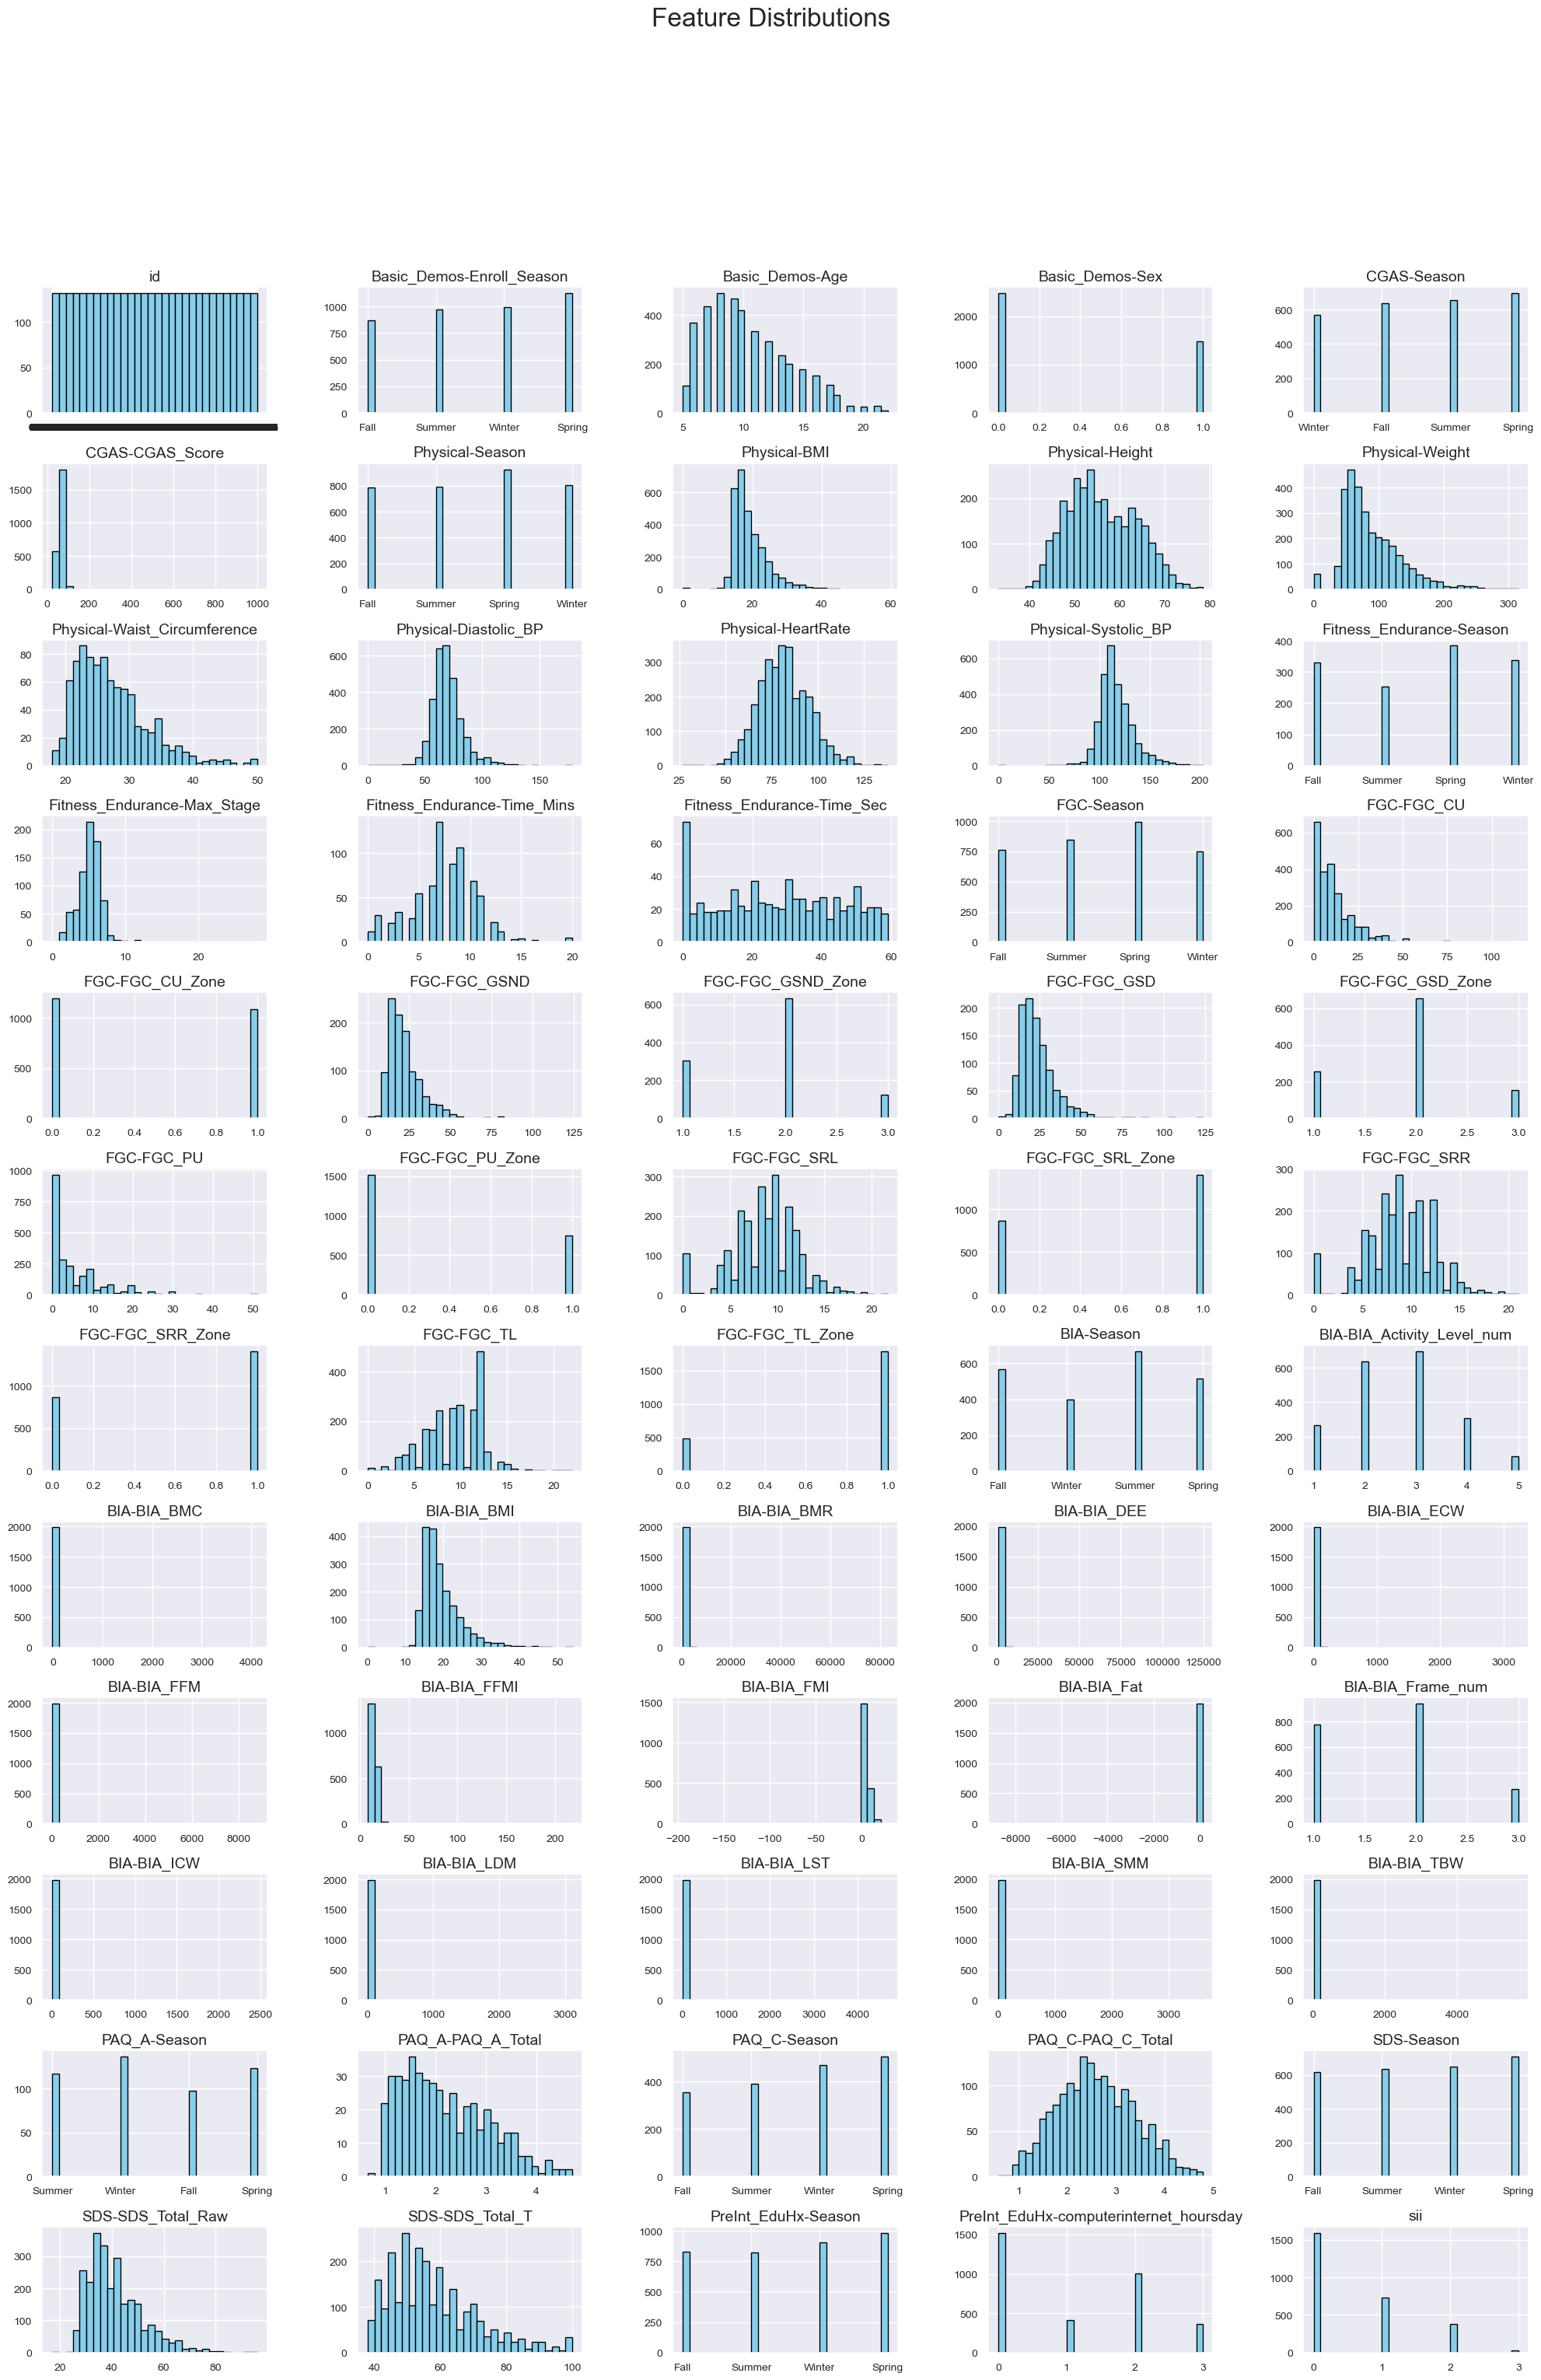

In [57]:

# Set up a larger figure size with individual subplots for each feature's histogram
fig, axes = plt.subplots(nrows=12, ncols=5, figsize=(20, 30))  # Adjust rows and columns as needed
fig.suptitle("Feature Distributions", fontsize=24, y=1.02)  # Title above all plots with larger font size

# Flatten the axes array for easy iteration, if there are fewer plots than grid cells
axes = axes.flatten()

# Plot a histogram for each feature
for i, column in enumerate(train_df_filtered.columns):
    if i < len(axes):  # Avoid error if there are more subplots than columns
        train_df_filtered[column].hist(bins=30, ax=axes[i], color="skyblue", edgecolor="black")
        axes[i].set_title(column, fontsize=14)
        axes[i].tick_params(axis='x', labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent title overlap and improve spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)  # Adjust hspace and wspace as needed
plt.show()


/var/folders/lg/w3yrnfgj1nz5k2fzjnmw2myr0000gn/T/ipykernel_21085/474999972.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df_filtered.corr()


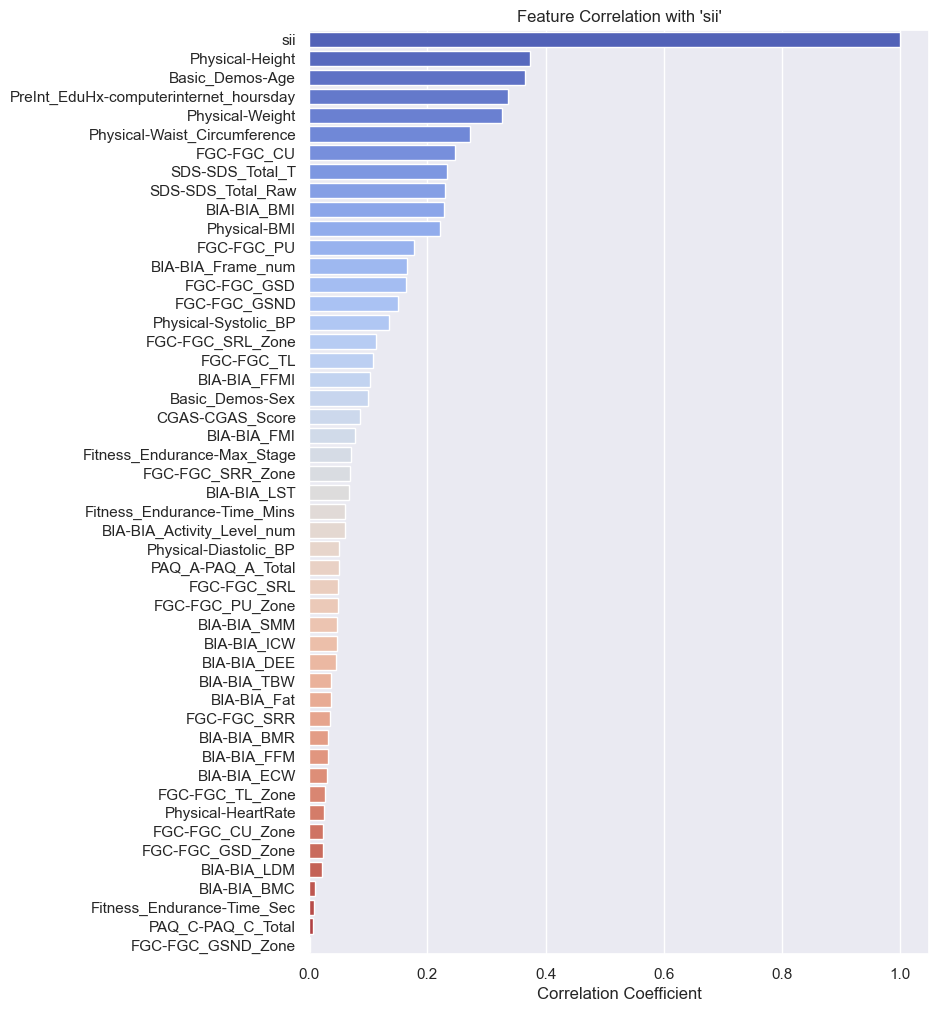

In [62]:
# Load train data if not already loaded
# train_df = pd.read_csv('train.csv')  # Uncomment if you haven't already loaded train_df

# Calculate the correlation matrix
corr_matrix = train_df_filtered.corr()

### Step 1: Find Correlations with "sii" ###

# Get correlations with "sii" and sort by absolute value to see strongest correlations at the top
sii_corr = corr_matrix['sii'].abs().sort_values(ascending=False)
# print("Correlation of features with 'sii':")
# print(sii_corr)

# Plot correlations with "sii"
plt.figure(figsize=(8, 12))
sns.barplot(y=sii_corr.index, x=sii_corr.values, palette="coolwarm")
plt.title("Feature Correlation with 'sii'")
plt.xlabel("Correlation Coefficient")
plt.show()


### Step 2: Identify Highly Correlated Feature Pairs ###

# Set a correlation threshold to identify highly correlated pairs
correlation_threshold = 0.8

# Find pairs of features with high correlation (absolute value above the threshold)
high_corr_pairs = [(feature_a, feature_b) for feature_a in corr_matrix.columns for feature_b in corr_matrix.columns
                   if feature_a != feature_b and abs(corr_matrix.loc[feature_a, feature_b]) > correlation_threshold]

# # Display highly correlated feature pairs
# # print("\nHighly correlated feature pairs (threshold > 0.8):")
# for feature_a, feature_b in high_corr_pairs:
#     print(f"{feature_a} and {feature_b}: correlation = {corr_matrix.loc[feature_a, feature_b]}")

In [67]:
# Retrieve the correlation between "Basic_Demos-Sex" and "sii"
sii_sex_corr = abs(corr_matrix.loc['sii', 'Basic_Demos-Sex'])

# Display the correlation
print("Correlation between 'Basic_Demos-Sex' and 'sii':", sii_sex_corr)

Correlation between 'Basic_Demos-Sex' and 'sii': 0.10014836137814967


In [68]:


# Calculate the absolute value of sii_sex_corr
threshold = sii_sex_corr

# Filter sii_corr to include only features with a correlation higher than this threshold
higher_corr_features = sii_corr[abs(sii_corr) > threshold]

# Display the features with higher absolute correlation than "Basic_Demos-Sex"
print("Features with higher correlation than 'Basic_Demos-Sex' with 'sii':")
print(higher_corr_features)


Features with higher correlation than 'Basic_Demos-Sex' with 'sii':
sii                                       1.000000
Physical-Height                           0.373530
Basic_Demos-Age                           0.365990
PreInt_EduHx-computerinternet_hoursday    0.336526
Physical-Weight                           0.325938
Physical-Waist_Circumference              0.272885
FGC-FGC_CU                                0.247364
SDS-SDS_Total_T                           0.232982
SDS-SDS_Total_Raw                         0.229692
BIA-BIA_BMI                               0.227818
Physical-BMI                              0.221125
FGC-FGC_PU                                0.177125
BIA-BIA_Frame_num                         0.165936
FGC-FGC_GSD                               0.163448
FGC-FGC_GSND                              0.149495
Physical-Systolic_BP                      0.135336
FGC-FGC_SRL_Zone                          0.112497
FGC-FGC_TL                                0.107623
BIA-BIA_FFMI  

In [75]:
# Assuming train_df_filtered and higher_corr_features are defined from previous steps
# higher_corr_features should contain the features with correlation higher than abs(sii_sex_corr)
# Filter train_df_filtered to keep only those features and the target variable "sii"

# Ensure "sii" is included in the final DataFrame
train_df_final = train_df_filtered[higher_corr_features.index.tolist() + ['Basic_Demos-Sex']]

# Display the shape and first few rows of the final DataFrame to verify
print("Shape of train_df_final:", train_df_final.shape)
print("First few rows of train_df_final:")
train_df_final.head()


Shape of train_df_final: (3960, 20)
First few rows of train_df_final:


,sii,Physical-Height,Basic_Demos-Age,PreInt_EduHx-computerinternet_hoursday,Physical-Weight,Physical-Waist_Circumference,FGC-FGC_CU,SDS-SDS_Total_T,SDS-SDS_Total_Raw,BIA-BIA_BMI,Physical-BMI,FGC-FGC_PU,BIA-BIA_Frame_num,FGC-FGC_GSD,FGC-FGC_GSND,Physical-Systolic_BP,FGC-FGC_SRL_Zone,FGC-FGC_TL,BIA-BIA_FFMI,Basic_Demos-Sex
0,2.0,46.0,5,3.0,50.8,NaN,0.0,NaN,NaN,16.8792,16.877316,0.0,1.0,NaN,NaN,NaN,0.0,6.0,13.8177,0
1,0.0,48.0,9,0.0,46.0,22.0,3.0,64.0,46.0,14.0371,14.035590,5.0,1.0,NaN,NaN,122.0,1.0,3.0,12.8254,0
2,0.0,56.5,10,2.0,75.6,NaN,20.0,54.0,38.0,NaN,16.648696,7.0,NaN,14.7,10.2,117.0,1.0,5.0,NaN,1
3,1.0,56.0,9,0.0,81.6,NaN,18.0,45.0,31.0,18.2943,18.292347,5.0,2.0,NaN,NaN,117.0,0.0,7.0,14.0740,0
4,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


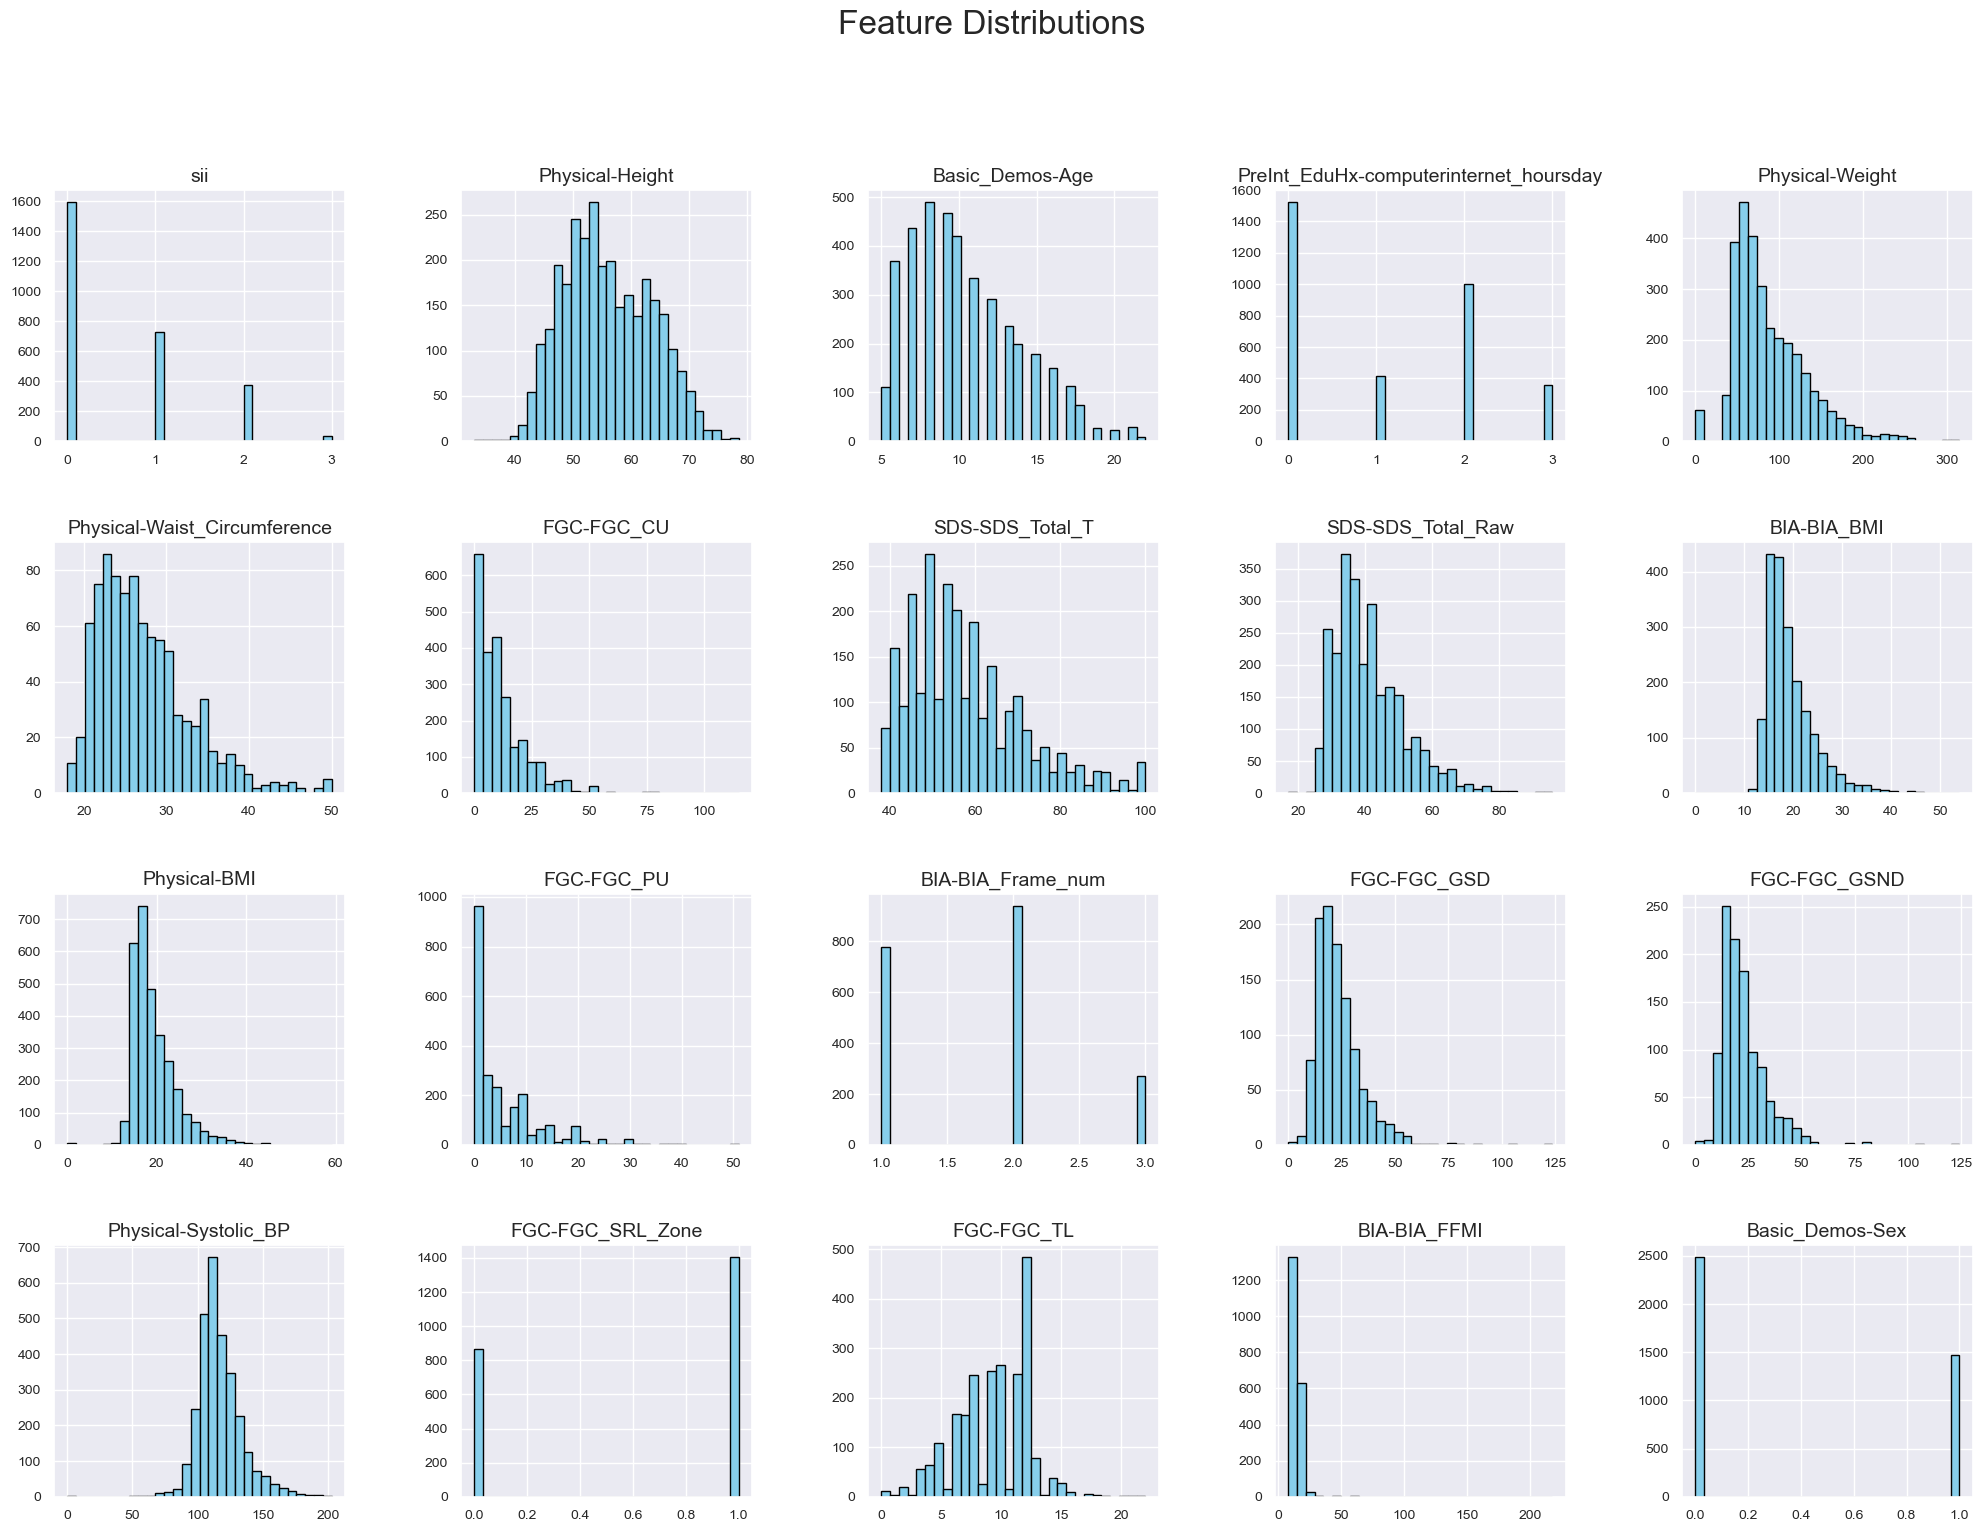

In [76]:
# Set up a larger figure size with individual subplots for each feature's histogram
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))  # Adjust rows and columns as needed
fig.suptitle("Feature Distributions", fontsize=24, y=1.02)  # Title above all plots with larger font size

# Flatten the axes array for easy iteration, if there are fewer plots than grid cells
axes = axes.flatten()

# Plot a histogram for each feature
for i, column in enumerate(train_df_final.columns):
    if i < len(axes):  # Avoid error if there are more subplots than columns
        train_df_final[column].hist(bins=30, ax=axes[i], color="skyblue", edgecolor="black")
        axes[i].set_title(column, fontsize=14)
        axes[i].tick_params(axis='x', labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent title overlap and improve spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)  # Adjust hspace and wspace as needed
plt.show()

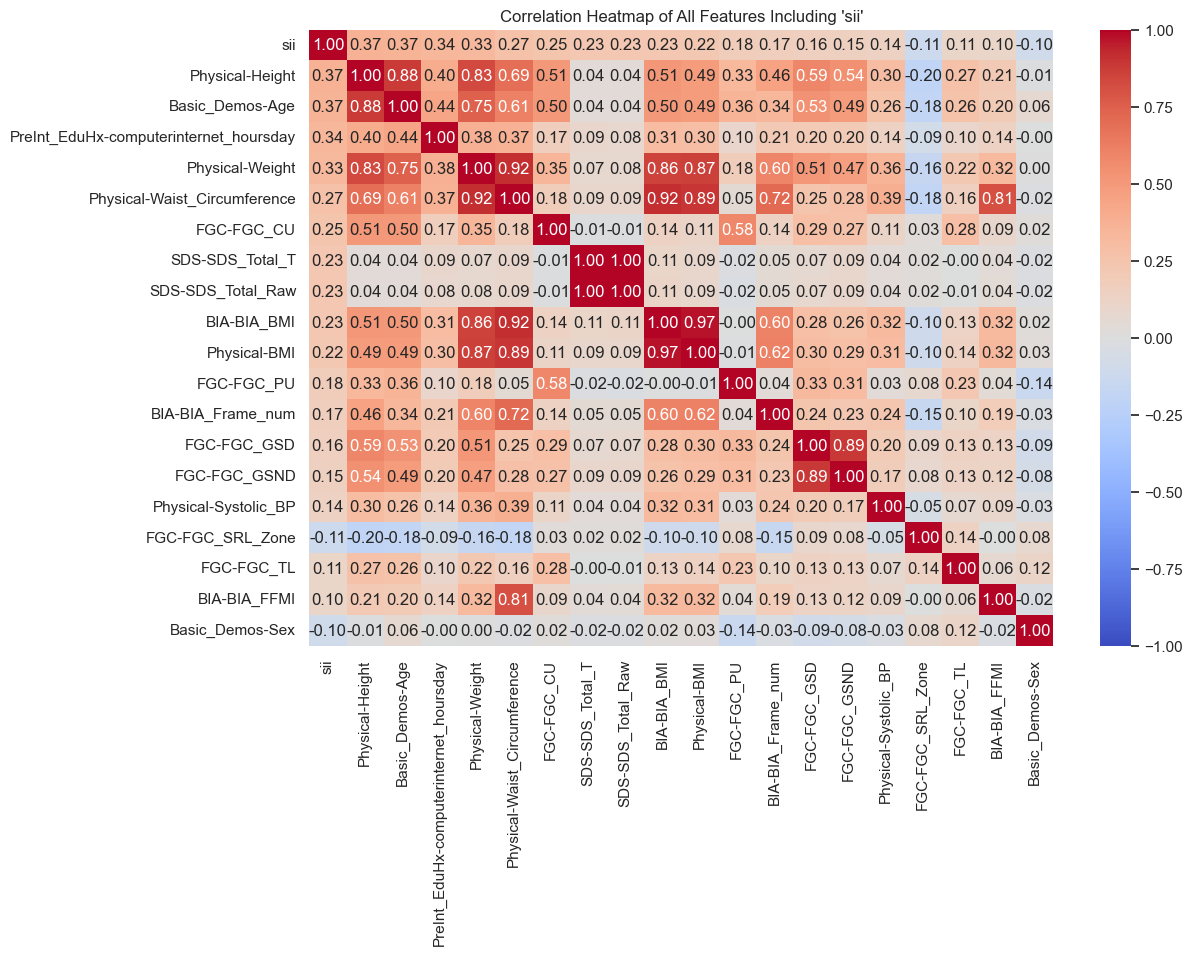

In [79]:
# Calculate the correlation matrix for all features in train_df_final
corr_matrix = train_df_final.corr()

# Plot the full correlation heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Heatmap of All Features Including 'sii'")
plt.show()



---
### Step 4: Data preprocessing (cont'd)

---
### Step 5: Modeling